<h1> Predicting Stock Prices using Neural Networks (W/ python) </h1>

<h3>Imports</h3>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

<strong> Load Data </strong>

In [53]:
company = 'FB'

start = dt.datetime(2012,1,1)
end = dt.datetime(2018,12,31)

data = web.DataReader(company,'yahoo', start, end)
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2018-12-24,129.740005,123.019997,123.099998,124.059998,22066000,124.059998
2018-12-26,134.240005,125.889999,126.000000,134.179993,39723400,134.179993
2018-12-27,134.990005,129.669998,132.440002,134.520004,31202500,134.520004


<strong>Prepare the data</strong>

In [54]:
scaler = MinMaxScaler ( feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train =[]
y_train =[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


<strong> Build Model </strong>

In [55]:
#O modelo que vamos construir é um modelo sequencial, isto significa de grosso modo que cada neuronio se liga apenas a neuronios da camada seguinte.
model = Sequential()

#LSTM -> 
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
51/51 [==============================] - 10s 84ms/step - loss: 0.0372
Epoch 2/25
51/51 [==============================] - 4s 87ms/step - loss: 0.0027
Epoch 3/25
51/51 [==============================] - 4s 82ms/step - loss: 0.0028
Epoch 4/25
51/51 [==============================] - 4s 83ms/step - loss: 0.0024
Epoch 5/25
51/51 [==============================] - 4s 85ms/step - loss: 0.0026
Epoch 6/25
51/51 [==============================] - 4s 83ms/step - loss: 0.0022
Epoch 7/25
51/51 [==============================] - 4s 87ms/step - loss: 0.0020
Epoch 8/25
51/51 [==============================] - 4s 83ms/step - loss: 0.0020
Epoch 9/25
51/51 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 10/25
51/51 [==============================] - 5s 91ms/step - loss: 0.0025
Epoch 11/25
51/51 [==============================] - 4s 84ms/step - loss: 0.0019
Epoch 12/25
51/51 [==============================] - 4s 86ms/step - loss: 0.0019
Epoch 13/25
51/51 [=================

<h3>Testing Model Accuracy on Existing data</h3>

In [56]:
test_start = dt.datetime(2019,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)- len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

<strong> Make predictions </strong>

In [57]:
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
# -----------------------------
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
# -----------------------------

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

<h3>Plot Test Predictions</h3>

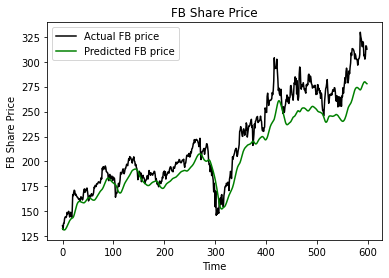

In [58]:
plt.plot(actual_prices, color='black', label=f'Actual {company} price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

<h3> Predict Next Day </h3>

In [59]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]

real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction {prediction}')


Prediction [[277.7132]]


In [60]:
print(dt.datetime.now())

2021-05-18 20:45:26.560113
